In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("vehicle.csv")

In [5]:
# Keep only numeric columns
X = df.select_dtypes(include=["float64", "int64"]).values

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Custom KMeans clustering function
def custom_kmeans(X, k=4, max_iters=15, random_state=42):
    np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    history = []

    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        # Save cluster distribution
        counts = pd.Series(labels).value_counts().sort_index()
        history.append([counts.get(j, 0) for j in range(k)])
        # Update centroids
        new_centroids = np.array([
            X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i+1}")
            break
        centroids = new_centroids

    return labels, centroids, history


In [17]:
# Run clustering
labels, centroids, history = custom_kmeans(X_scaled, k=4)

Converged at iteration 14


In [19]:
# Assign cluster labels to original DataFrame
df['CLUSTER'] = labels

In [21]:
# Create and display iteration history DataFrame
history_df = pd.DataFrame(history, columns=[f"Cluster {i}" for i in range(4)])
history_df.index = [f"Iteration {i+1}" for i in range(len(history))]

In [23]:
print("Cluster distribution per iteration:")
print(history_df)

Cluster distribution per iteration:
              Cluster 0  Cluster 1  Cluster 2  Cluster 3
Iteration 1         272        103        172        299
Iteration 2         260        185        179        222
Iteration 3         253        182        197        214
Iteration 4         251        165        198        232
Iteration 5         253        154        194        245
Iteration 6         255        155        182        254
Iteration 7         256        147        180        263
Iteration 8         258        138        185        265
Iteration 9         260        132        188        266
Iteration 10        263        127        187        269
Iteration 11        264        123        188        271
Iteration 12        264        121        187        274
Iteration 13        264        120        187        275
Iteration 14        264        120        187        275


In [25]:

# Show final cluster counts
final_counts = df['CLUSTER'].value_counts().sort_index()
print("\nFinal cluster counts:")
for cluster_id, count in final_counts.items():
    print(f"Cluster {cluster_id}: {count} points")
   


Final cluster counts:
Cluster 0: 264 points
Cluster 1: 120 points
Cluster 2: 187 points
Cluster 3: 275 points


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_8744\2222361145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLUSTER', data=df, palette='Set2')


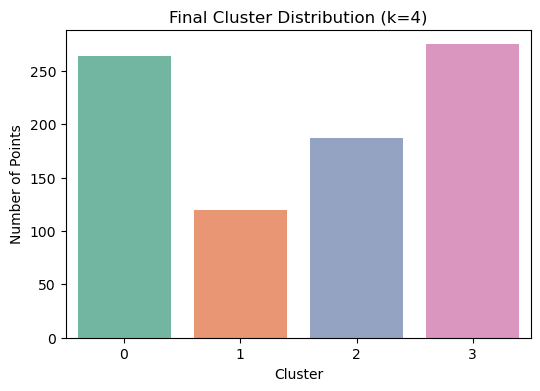

In [27]:
# Visualize final cluster distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='CLUSTER', data=df, palette='Set2')
plt.title("Final Cluster Distribution (k=4)")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()



Comparison of Actual Labels vs Cluster Assignments:
Predicted Cluster    0   1    2   3
Actual                             
bus                 49   0  100  69
opel               108  31   12  61
saab               104  34   15  64
van                  3  55   60  81


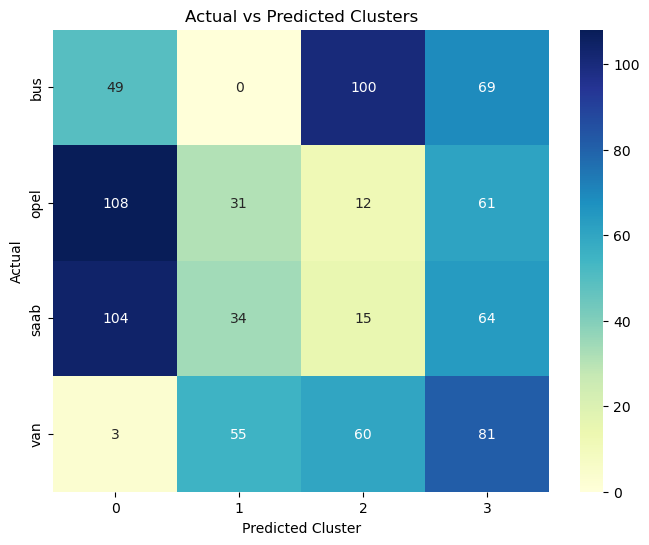

In [29]:
if 'Class' in df.columns or 'class' in df.columns:
    label_col = 'Class' if 'Class' in df.columns else 'class'

    # Show comparison table
    comparison = pd.crosstab(df[label_col], df['CLUSTER'], rownames=['Actual'], colnames=['Predicted Cluster'])
    print("\nComparison of Actual Labels vs Cluster Assignments:")
    print(comparison)

    # Optional: visualize the confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(comparison, annot=True, fmt='d', cmap='YlGnBu')
    plt.title("Actual vs Predicted Clusters")
    plt.show()
else:
    print("No actual label column found in the dataset to compare with.")
    labels = np.argmin(distances, axis=1)